# Domain Frekuensi

# Muhammad Farhan Arya Wicaksono

## 5054231011

**Enhancement Citra Menggunakan Low Pass Filter (LPF) dalam Domain Frekuensi**

---

### 1. Konsep Low Pass Filter (LPF)

Low Pass Filter dalam domain frekuensi digunakan untuk menyaring frekuensi tinggi pada citra, sehingga detail halus dan noise dikurangi. Frekuensi rendah yang berisi informasi dasar citra tetap dipertahankan.

**Manfaat LPF**:
- Menghaluskan citra (smoothing)
- Mengurangi noise
- Mengurangi detail kecil

Penerapannya dilakukan dengan mengalikan spektrum frekuensi dari citra dengan filter frekuensi rendah, lalu dilakukan inverse Fourier transform untuk mendapatkan citra hasil.

---

### 2. Jenis-Jenis LPF dan Rumus

#### a. Ideal Low Pass Filter (ILPF)
Filter berbentuk disk (lingkaran) di domain frekuensi.
$$ H(u,v) = \begin{cases}1, & \text{jika } D(u,v) \leq D_0 \\ 0, & \text{jika } D(u,v) > D_0 \end{cases} $$

#### b. Butterworth Low Pass Filter (BLPF)
Filter dengan transisi halus antara daerah pass dan stop band.
$$ H(u,v) = \frac{1}{1 + (\frac{D(u,v)}{D_0})^{2n}} $$

#### c. Gaussian Low Pass Filter (GLPF)
Transisi paling mulus, tanpa osilasi.
$$ H(u,v) = e^{-\frac{D^2(u,v)}{2D_0^2}} $$

Dimana:
- \[ D(u,v) \]: Jarak Euclidean dari pusat frekuensi
- \[ Do \]: Frekuensi cutoff
- \[ n \]: Order dari Butterworth

---

### 3. Implementasi Python

#### a. Template Fungsi Filter
```python
import numpy as np

def create_distance_matrix(shape):
    M, N = shape
    u = np.arange(M)
    v = np.arange(N)
    U, V = np.meshgrid(v, u)
    D = np.sqrt((U - N//2)**2 + (V - M//2)**2)
    return D
```

#### b. Ideal LPF
```python
def ideal_lpf(shape, D0):
    D = create_distance_matrix(shape)
    H = np.zeros_like(D)
    H[D <= D0] = 1
    return H
```

#### c. Butterworth LPF
```python
def butterworth_lpf(shape, D0, n):
    D = create_distance_matrix(shape)
    H = 1 / (1 + (D / D0)**(2 * n))
    return H
```

#### d. Gaussian LPF
```python
def gaussian_lpf(shape, D0):
    D = create_distance_matrix(shape)
    H = np.exp(-(D**2) / (2 * (D0**2)))
    return H
```

---

### 4. Aplikasi ke Citra dan Visualisasi
```python
import cv2
import matplotlib.pyplot as plt

# Load citra grayscale
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

# Terapkan filter
D0 = 30
H = gaussian_lpf(img.shape, D0)
G_shift = F_shift * H

# Invers FFT
G = np.fft.ifftshift(G_shift)
img_filtered = np.abs(np.fft.ifft2(G))

# Visualisasi Filter dan Magnitudo
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Citra Asli'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(np.log(1 + np.abs(F_shift)), cmap='gray')
plt.title('Spektrum Asli'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(H, cmap='gray')
plt.title('Spektrum Filter (Gaussian)'), plt.axis('off')
plt.show()

# Tampilkan hasil
plt.figure()
plt.imshow(img_filtered, cmap='gray')
plt.title('Hasil LPF (Gaussian)'), plt.axis('off')
plt.show()
```

---

### 5. Eksperimen Parameterisasi

Eksperimen ini bertujuan membandingkan efek berbagai parameter terhadap hasil filtering.

#### a. Pengaruh D0 terhadap Gaussian LPF
```python
for D0 in [10, 30, 60]:
    H = gaussian_lpf(img.shape, D0)
    G_shift = F_shift * H
    G = np.fft.ifftshift(G_shift)
    img_filtered = np.abs(np.fft.ifft2(G))

    plt.figure(figsize=(6, 3))
    plt.imshow(img_filtered, cmap='gray')
    plt.title(f'Gaussian LPF (D0={D0})')
    plt.axis('off')
    plt.show()
```

#### b. Pengaruh Orde n pada Butterworth LPF
```python
for n in [1, 2, 4]:
    H = butterworth_lpf(img.shape, 30, n)
    G_shift = F_shift * H
    G = np.fft.ifftshift(G_shift)
    img_filtered = np.abs(np.fft.ifft2(G))

    plt.figure(figsize=(6, 3))
    plt.imshow(img_filtered, cmap='gray')
    plt.title(f'Butterworth LPF (n={n})')
    plt.axis('off')
    plt.show()
```

---

### 6. Perbandingan Visual dan Analisis

Eksperimen perbandingan antara ILPF, BLPF, dan GLPF dengan parameter \( Do \) yang sama dapat menunjukkan perbedaan hasil smoothing. Semakin tinggi \( Do \), semakin banyak frekuensi yang dipertahankan.

Kita dapat membandingkan hasilnya secara kuantitatif menggunakan MSE atau PSNR terhadap citra asli (terutama jika citra referensi tanpa noise tersedia).

```python
from skimage.metrics import peak_signal_noise_ratio as psnr

ref = img  # citra referensi
psnr_val = psnr(ref, img_filtered)
print("PSNR:", psnr_val)
```

---

### 7. Kesimpulan

Penggunaan Low Pass Filter dalam domain frekuensi memungkinkan penghilangan komponen frekuensi tinggi yang umumnya mengandung noise atau detail halus. Tiga jenis filter yang umum digunakan—Ideal, Butterworth, dan Gaussian—memiliki karakteristik yang berbeda terkait transisi dari passband ke stopband. Gaussian memberikan hasil paling halus, sementara Ideal memiliki batasan keras yang bisa menghasilkan ringing. Dengan melakukan eksperimen pada parameter seperti cutoff frequency \( Do \) dan orde filter, pengguna dapat menyesuaikan efek smoothing sesuai kebutuhan. Visualisasi spektrum filter membantu memahami bagaimana filter bekerja, dan evaluasi kuantitatif seperti PSNR bisa digunakan untuk menilai efektivitas transformasi.


# Implentasi Code


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
from skimage.metrics import peak_signal_noise_ratio as psnr

In [ ]:
# 3. Implementasi Python
# a. Template Fungsi Filter
import numpy as np

def create_distance_matrix(shape):
    M, N = shape
    u = np.arange(M)
    v = np.arange(N)
    U, V = np.meshgrid(v, u)
    D = np.sqrt((U - N//2)**2 + (V - M//2)**2)
    return D

# b. Ideal LPF
def ideal_lpf(shape, D0):
    D = create_distance_matrix(shape)
    H = np.zeros_like(D)
    H[D <= D0] = 1
    return H

# c. Butterworth LPF
def butterworth_lpf(shape, D0, n):
    D = create_distance_matrix(shape)
    H = 1 / (1 + (D / D0)**(2 * n))
    return H

# d. Gaussian LPF
def gaussian_lpf(shape, D0):
    D = create_distance_matrix(shape)
    H = np.exp(-(D**2) / (2 * (D0**2)))
    return H

## ideal LPF

### Ideal LPF dengan  D0 = 30

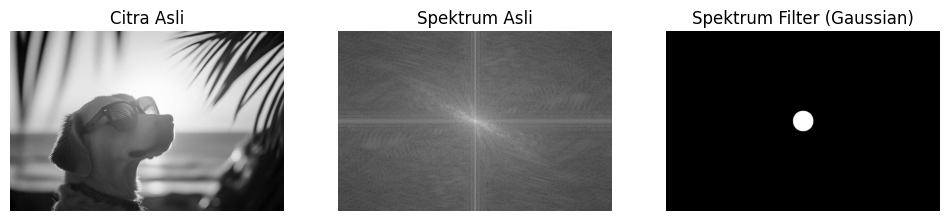

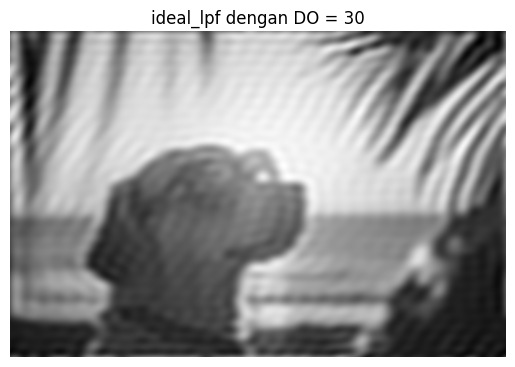

In [ ]:
# Load citra grayscale
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

# Terapkan filter
D0 = 30
H = ideal_lpf(img.shape, D0)
G_shift = F_shift * H

# Invers FFT
G = np.fft.ifftshift(G_shift)
img_filtered = np.abs(np.fft.ifft2(G))

# Visualisasi Filter dan Magnitudo
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Citra Asli'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(np.log(1 + np.abs(F_shift)), cmap='gray')
plt.title('Spektrum Asli'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(H, cmap='gray')
plt.title('Spektrum Filter (Gaussian)'), plt.axis('off')
plt.show()

# Tampilkan hasil
plt.figure()
plt.imshow(img_filtered, cmap='gray')
plt.title(f'ideal_lpf dengan DO = {D0}'), plt.axis('off')
plt.show()

### Idela LPF dengan D0 = 100

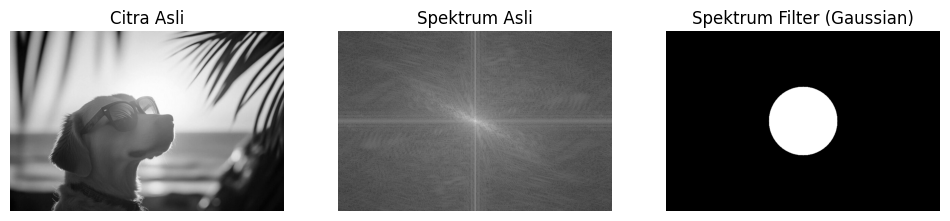

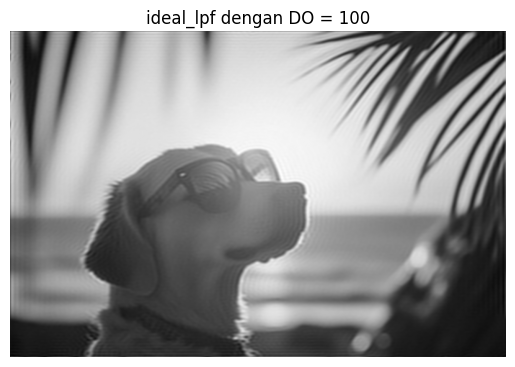

In [ ]:
# Load citra grayscale
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

# Terapkan filter
D0 = 100
H = ideal_lpf(img.shape, D0)
G_shift = F_shift * H

# Invers FFT
G = np.fft.ifftshift(G_shift)
img_filtered = np.abs(np.fft.ifft2(G))

# Visualisasi Filter dan Magnitudo
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Citra Asli'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(np.log(1 + np.abs(F_shift)), cmap='gray')
plt.title('Spektrum Asli'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(H, cmap='gray')
plt.title('Spektrum Filter (Gaussian)'), plt.axis('off')
plt.show()

# Tampilkan hasil
plt.figure()
plt.imshow(img_filtered, cmap='gray')
plt.title(f'ideal_lpf dengan DO = {D0}'), plt.axis('off')
plt.show()

##  Butter Worth LPF

### Butter Worth LPF dengan  D0 = 30

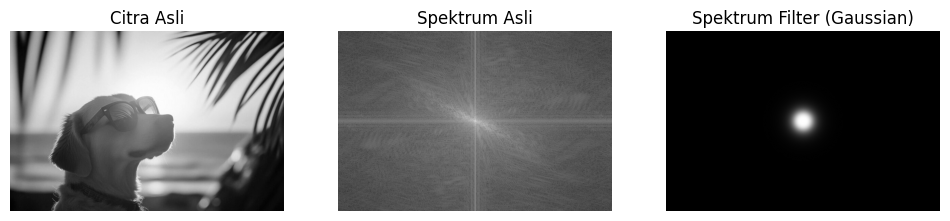

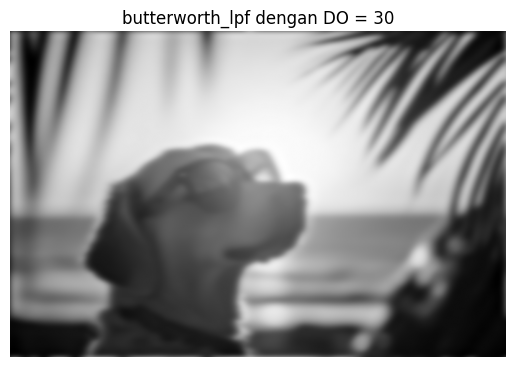

In [ ]:
# Load citra grayscale
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

# Terapkan filter
D0 = 30
n = 2
H = butterworth_lpf(img.shape, D0, n)
G_shift = F_shift * H

# Invers FFT
G = np.fft.ifftshift(G_shift)
img_filtered = np.abs(np.fft.ifft2(G))

# Visualisasi Filter dan Magnitudo
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Citra Asli'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(np.log(1 + np.abs(F_shift)), cmap='gray')
plt.title('Spektrum Asli'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(H, cmap='gray')
plt.title('Spektrum Filter (Gaussian)'), plt.axis('off')
plt.show()

# Tampilkan hasil
plt.figure()
plt.imshow(img_filtered, cmap='gray')
plt.title(f'butterworth_lpf dengan DO = {D0}'), plt.axis('off')
plt.show()

### Butter Worth LPF dengan D0 = 100

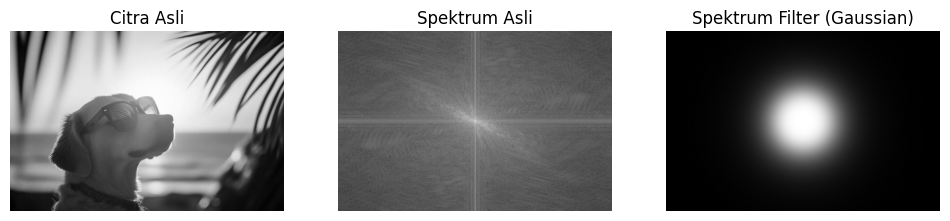

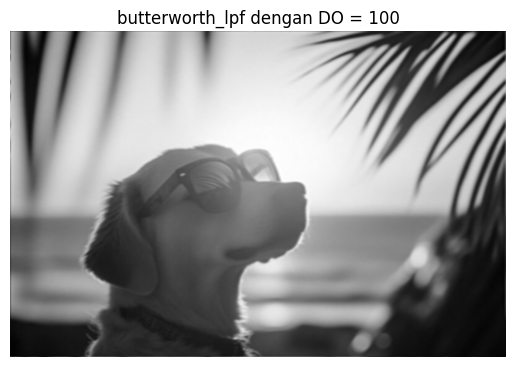

In [ ]:
# Load citra grayscale
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

# Terapkan filter
D0 = 100
n = 2
H = butterworth_lpf(img.shape, D0, n)
G_shift = F_shift * H

# Invers FFT
G = np.fft.ifftshift(G_shift)
img_filtered = np.abs(np.fft.ifft2(G))

# Visualisasi Filter dan Magnitudo
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Citra Asli'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(np.log(1 + np.abs(F_shift)), cmap='gray')
plt.title('Spektrum Asli'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(H, cmap='gray')
plt.title('Spektrum Filter (Gaussian)'), plt.axis('off')
plt.show()

# Tampilkan hasil
plt.figure()
plt.imshow(img_filtered, cmap='gray')
plt.title(f'butterworth_lpf dengan DO = {D0}'), plt.axis('off')
plt.show()

## Gausian LBF

### Gausian LBF dengan D0 = 30


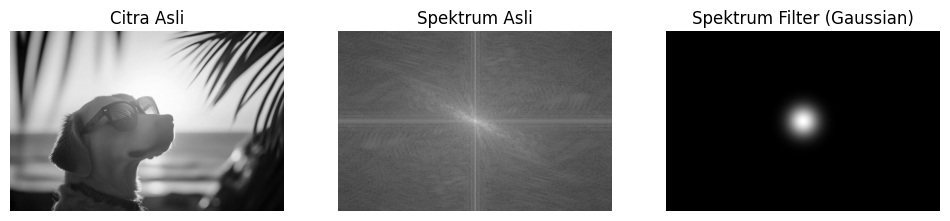

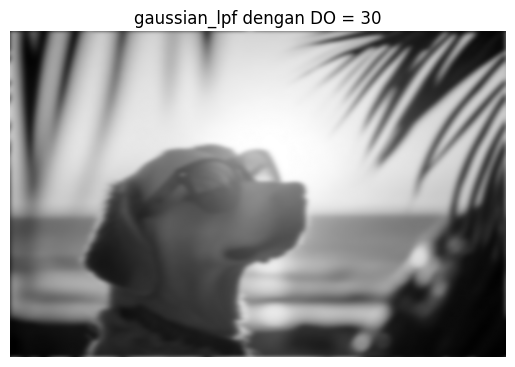

In [ ]:
# Load citra grayscale
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

# Terapkan filter
D0 = 30
n = 2
H = gaussian_lpf(img.shape, D0)
G_shift = F_shift * H

# Invers FFT
G = np.fft.ifftshift(G_shift)
img_filtered = np.abs(np.fft.ifft2(G))

# Visualisasi Filter dan Magnitudo
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Citra Asli'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(np.log(1 + np.abs(F_shift)), cmap='gray')
plt.title('Spektrum Asli'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(H, cmap='gray')
plt.title('Spektrum Filter (Gaussian)'), plt.axis('off')
plt.show()

# Tampilkan hasil
plt.figure()
plt.imshow(img_filtered, cmap='gray')
plt.title(f'gaussian_lpf dengan DO = {D0}'), plt.axis('off')
plt.show()

### Gausian LBF dengan B0 = 100

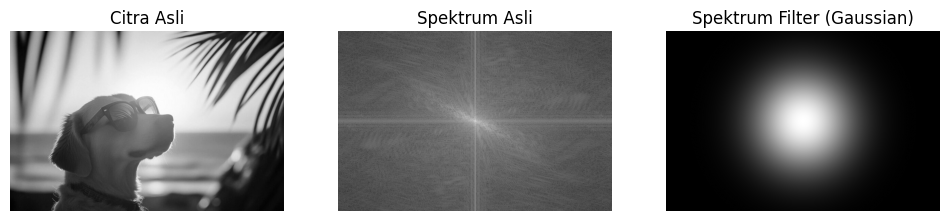

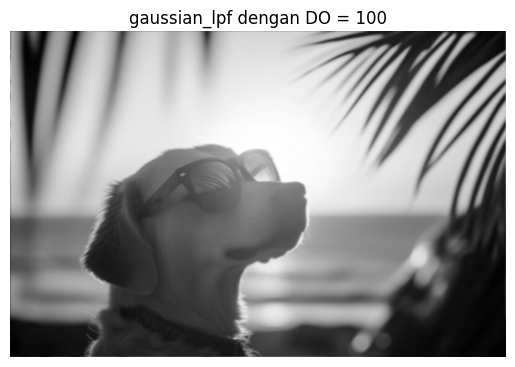

In [ ]:
# Load citra grayscale
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)

# Terapkan filter
D0 = 100
n = 2
H = gaussian_lpf(img.shape, D0)
G_shift = F_shift * H

# Invers FFT
G = np.fft.ifftshift(G_shift)
img_filtered = np.abs(np.fft.ifft2(G))

# Visualisasi Filter dan Magnitudo
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Citra Asli'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(np.log(1 + np.abs(F_shift)), cmap='gray')
plt.title('Spektrum Asli'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(H, cmap='gray')
plt.title('Spektrum Filter (Gaussian)'), plt.axis('off')
plt.show()

# Tampilkan hasil
plt.figure()
plt.imshow(img_filtered, cmap='gray')
plt.title(f'gaussian_lpf dengan DO = {D0}'), plt.axis('off')
plt.show()

# Eksperimen Parameterisasi
Eksperimen ini bertujuan membandingkan efek berbagai parameter terhadap hasil filtering.


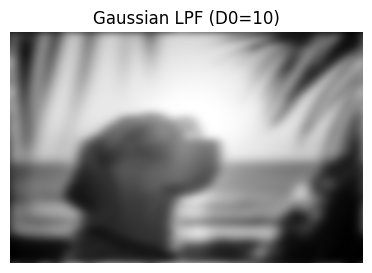

<ipython-input-32-ce50a03cbb8a>:15: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_val = psnr(ref, img_filtered)


PSNR: 21.06682235759282


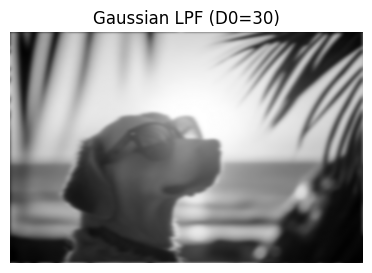

PSNR: 27.248026651614424


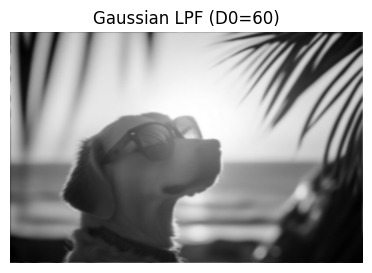

PSNR: 32.723688639009524


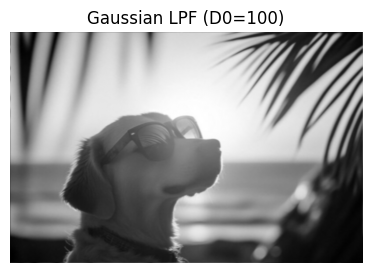

PSNR: 36.7986692170379


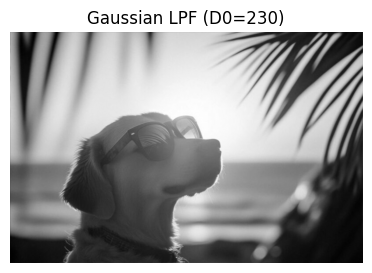

PSNR: 45.25327167084111


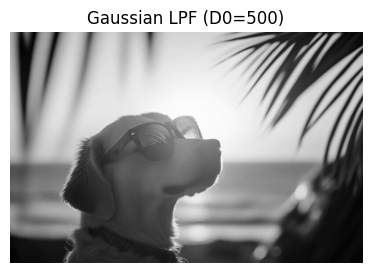

PSNR: 56.5153679293708


In [ ]:

# a. Pengaruh D0 terhadap Gaussian LPF
for D0 in [10, 30, 60, 100, 230, 500]:
    H = gaussian_lpf(img.shape, D0)
    G_shift = F_shift * H
    G = np.fft.ifftshift(G_shift)
    img_filtered = np.abs(np.fft.ifft2(G))

    plt.figure(figsize=(6, 3))
    plt.imshow(img_filtered, cmap='gray')
    plt.title(f'Gaussian LPF (D0={D0})')
    plt.axis('off')
    plt.show()

    ref = img  # citra referensi
    psnr_val = psnr(ref, img_filtered)
    print("PSNR:", psnr_val)

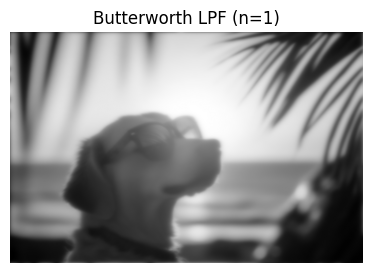

<ipython-input-33-8b30eafc514a>:15: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_val = psnr(ref, img_filtered)


PSNR: 26.480885218986803


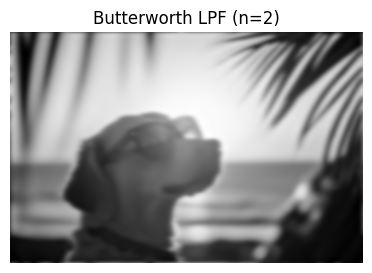

PSNR: 26.170146928770748


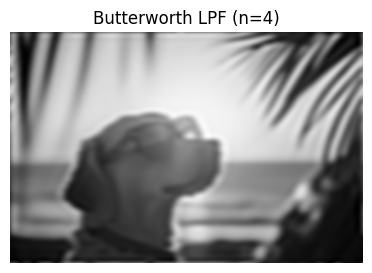

PSNR: 25.638799990581013


In [ ]:

# b. Pengaruh Orde n pada Butterworth LPF
for n in [1, 2, 4]:
    H = butterworth_lpf(img.shape, 30, n)
    G_shift = F_shift * H
    G = np.fft.ifftshift(G_shift)
    img_filtered = np.abs(np.fft.ifft2(G))

    plt.figure(figsize=(6, 3))
    plt.imshow(img_filtered, cmap='gray')
    plt.title(f'Butterworth LPF (n={n})')
    plt.axis('off')
    plt.show()

    ref = img  # citra referensi
    psnr_val = psnr(ref, img_filtered)
    print("PSNR:", psnr_val)
